# CMSE 802 Pre-class assignment: Logistic Regression and Random Forests
## Date: 11/21/2018
## Due: 11/26/2018; 10:30 PM

### The goal of this assignment is to introduce logistic regression and random forest algorithms.

---
### Your name: Boyao Zhu

---
### Logistic Regression


Logistic regression is somewhat of a misnomer: it is not a regression algorithm (those predict a continuous variable), but  rather, it is a two-class classification method. It can be used in multi-class classification via the One Versus All approach (see https://en.wikipedia.org/wiki/Multiclass_classification).

Please watch the following videos for logistic regression.

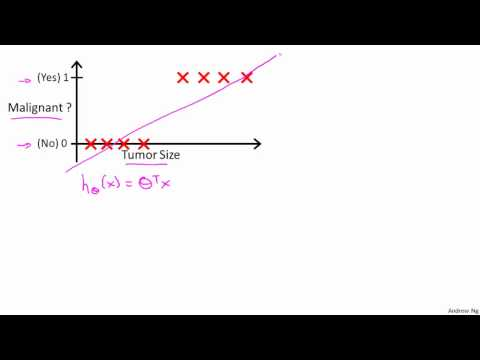

In [1]:
from IPython.display import YouTubeVideo
YouTubeVideo("86sKNK_6kWU",width=640,height=360)

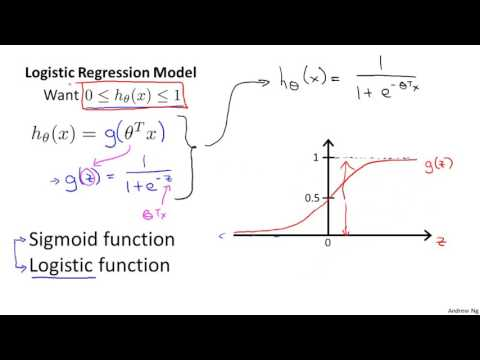

In [2]:
YouTubeVideo("gVN7jDcW-sc",width=640,height=360)

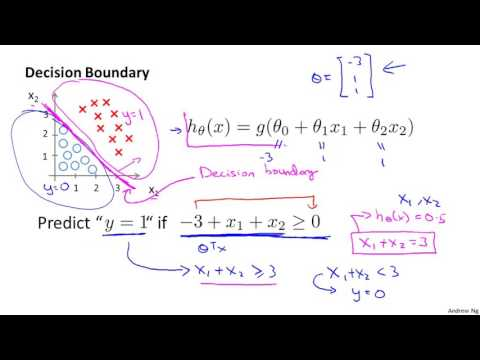

In [3]:
YouTubeVideo("4WRmuf8-S3k",width=640,height=360)

### Logistic Regression with scikit learn



The problem at hand is predicting admission into an academic program, using  GRE scores, GPA and rank of program.

---



We will use pandas to retrive the data table from the provided url:

In [4]:
import pandas as pd
import numpy as np

url = 'https://stats.idre.ucla.edu/stat/data/binary.csv'

# fetch the text from the URL and read it into a DataFrame
df = pd.read_csv(url) # the columns are separated by tab


In [5]:
df.head(5) # show the first 5 rows

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


In [6]:
 # rename the 'rank' column because there is also a DataFrame method called 'rank'
df.columns = ["admit", "gre", "gpa", "prestige"]

df.head()

,admit,gre,gpa,prestige
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4


---

### Activity 1

Check if there are missing values. If so, fill them in.

In [7]:
# your code 

df.describe()

df.apply(lambda x: sum(x.isnull()),axis=0)

admit       0
gre         0
gpa         0
prestige    0
dtype: int64


---

Groupby is a useful method that one can apply to DataFrames:

In [8]:
df.groupby('prestige').describe()

admit                                                 gpa            \
          count      mean       std  min  25%  50%  75%  max  count      mean   
prestige                                                                        
1          61.0  0.540984  0.502453  0.0  0.0  1.0  1.0  1.0   61.0  3.453115   
2         151.0  0.357616  0.480893  0.0  0.0  0.0  1.0  1.0  151.0  3.361656   
3         121.0  0.231405  0.423484  0.0  0.0  0.0  0.0  1.0  121.0  3.432893   
4          67.0  0.179104  0.386334  0.0  0.0  0.0  0.0  1.0   67.0  3.318358   

          ...                  gre                                        \
          ...      75%  max  count        mean         std    min    25%   
prestige  ...                                                              
1         ...    3.730  4.0   61.0  611.803279  120.242924  340.0  540.0   
2         ...    3.615  4.0  151.0  596.026490  107.008283  300.0  520.0   
3         ...    3.760  4.0  121.0  574.876033  121.148089  220.0  500.0   
4         ...    3.540  4.0   67.0  570.149254  116.221999  300.0  500.0   

                               
            50%    75%    max  
prestige                       
1         600.0  700.0  800.0  
2         600.0  660.0  800.0  
3         580.0  660.0  800.0  
4         560.0  660.0  800.0  

[4 rows x 24 columns]

In [12]:
# Data preparation

X = df.copy()

y = X['admit']

X = X.drop(['admit'], axis=1)

# X

In [13]:
# Data scaling (mean = 0, variance =1)

from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X = scaler.fit_transform(X)


In [14]:
# Random split (80% training, 20% validation)

from sklearn.cross_validation import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y ,test_size = 0.2, random_state = 42)

/anaconda3/lib/python3.6/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [15]:
# Fit the logistic model

from sklearn.linear_model import LogisticRegression

model = LogisticRegression()

model.fit(X_train, y_train)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

In [16]:
# Here are some predictions on the testing set

model.predict(X_test)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0])

In [17]:
# Here is the accuracy (percentage of correct predictions)

from sklearn.metrics import accuracy_score

accuracy_score(y_test, model.predict(X_test))

0.6625

### Activity 2

Given the accuracy in predictions, what are your thoughts about the model: overffiting, underfitting, improvements? 

**Your answer:** It is probably overfitting

---

### Random Forests

From wikipedia: *Random forests or random decision forests are an ensemble learning method for classification, regression and other tasks, that operate by constructing a multitude of decision trees at training time and outputting the class that is the mode of the classes (classification) or mean prediction (regression) of the individual trees. Random decision forests correct for decision trees' habit of overfitting to their training set.*

source: https://en.wikipedia.org/wiki/Random_forest

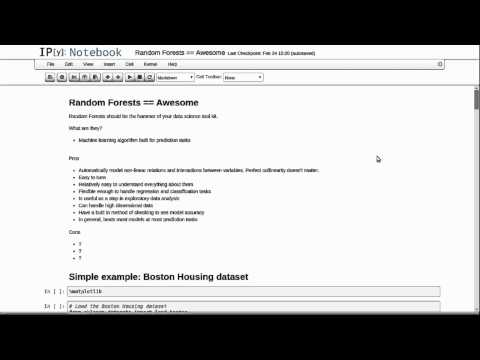

In [18]:
YouTubeVideo("MRi99ax50sw",width=640,height=360)

### Decision Trees

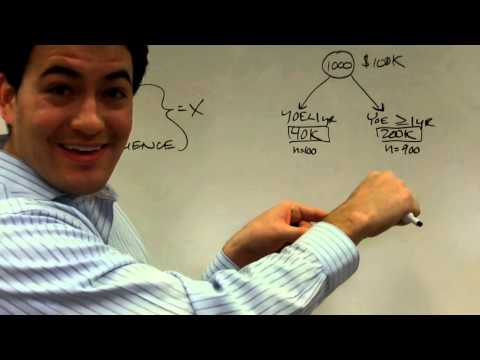

In [19]:
from datetime import timedelta

start =int(timedelta(hours=0, minutes=0, seconds=7).total_seconds())
end =int(timedelta(hours=0, minutes=9, seconds=12).total_seconds())

YouTubeVideo("JAimuWLOpUQ",width=640,height=360, start=start, end=end)


### Bootstrap

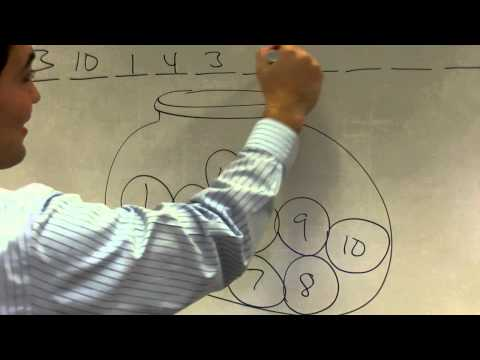

In [20]:
YouTubeVideo("xazSYSvG2_0",width=640,height=360)

### The random forest algorithm and its parameters

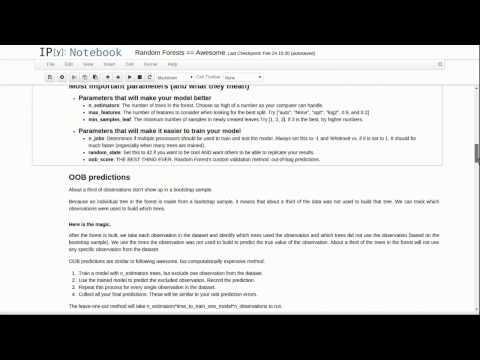

In [21]:
YouTubeVideo("GofidHdilas",width=640,height=360)

### Random Forest in scikit learn

Now we use a Random Forest classifier on the same data set:

In [22]:
from sklearn.ensemble import RandomForestClassifier

In [23]:
model = RandomForestClassifier()

In [24]:
model.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [25]:
model.predict(X_test)

array([0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0])

In [26]:
accuracy_score(y_test, model.predict(X_test))

0.6375

### Activity 3

Given the accuracy in predictions, what are your thoughts about the model: overffiting, underfitting, improvements?

**Your answer:** overfitting

---
### Congratulations, you're done with the pre-class assignment!

Now, you just need to submit this assignment by uploading it to the course Desire2Learn web page.  Go to Assessments > Dropbox, find the link for Pre-class assignment 20171128, and upload it there.

See you in class!